In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Load the dataset

In [2]:
df = pd.read_csv('2015.csv')

df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df.shape

(158, 12)

In [4]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Check for Null Values

In [7]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


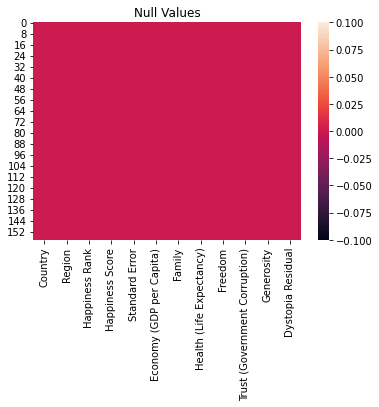

In [8]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [9]:
df.isnull().sum().sum()

0

drop the columns which are not contributing to target variable

In [10]:
df = df.drop(['Country','Region','Happiness Rank'],axis=1)

In [11]:
df.head(5)

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# Target Variable

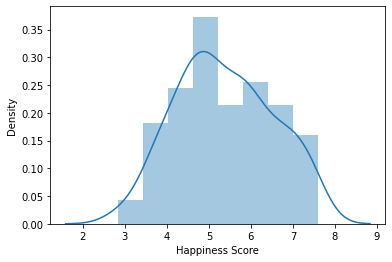

In [12]:
sns.distplot(df['Happiness Score']);

# Feature Distribution of Dataset

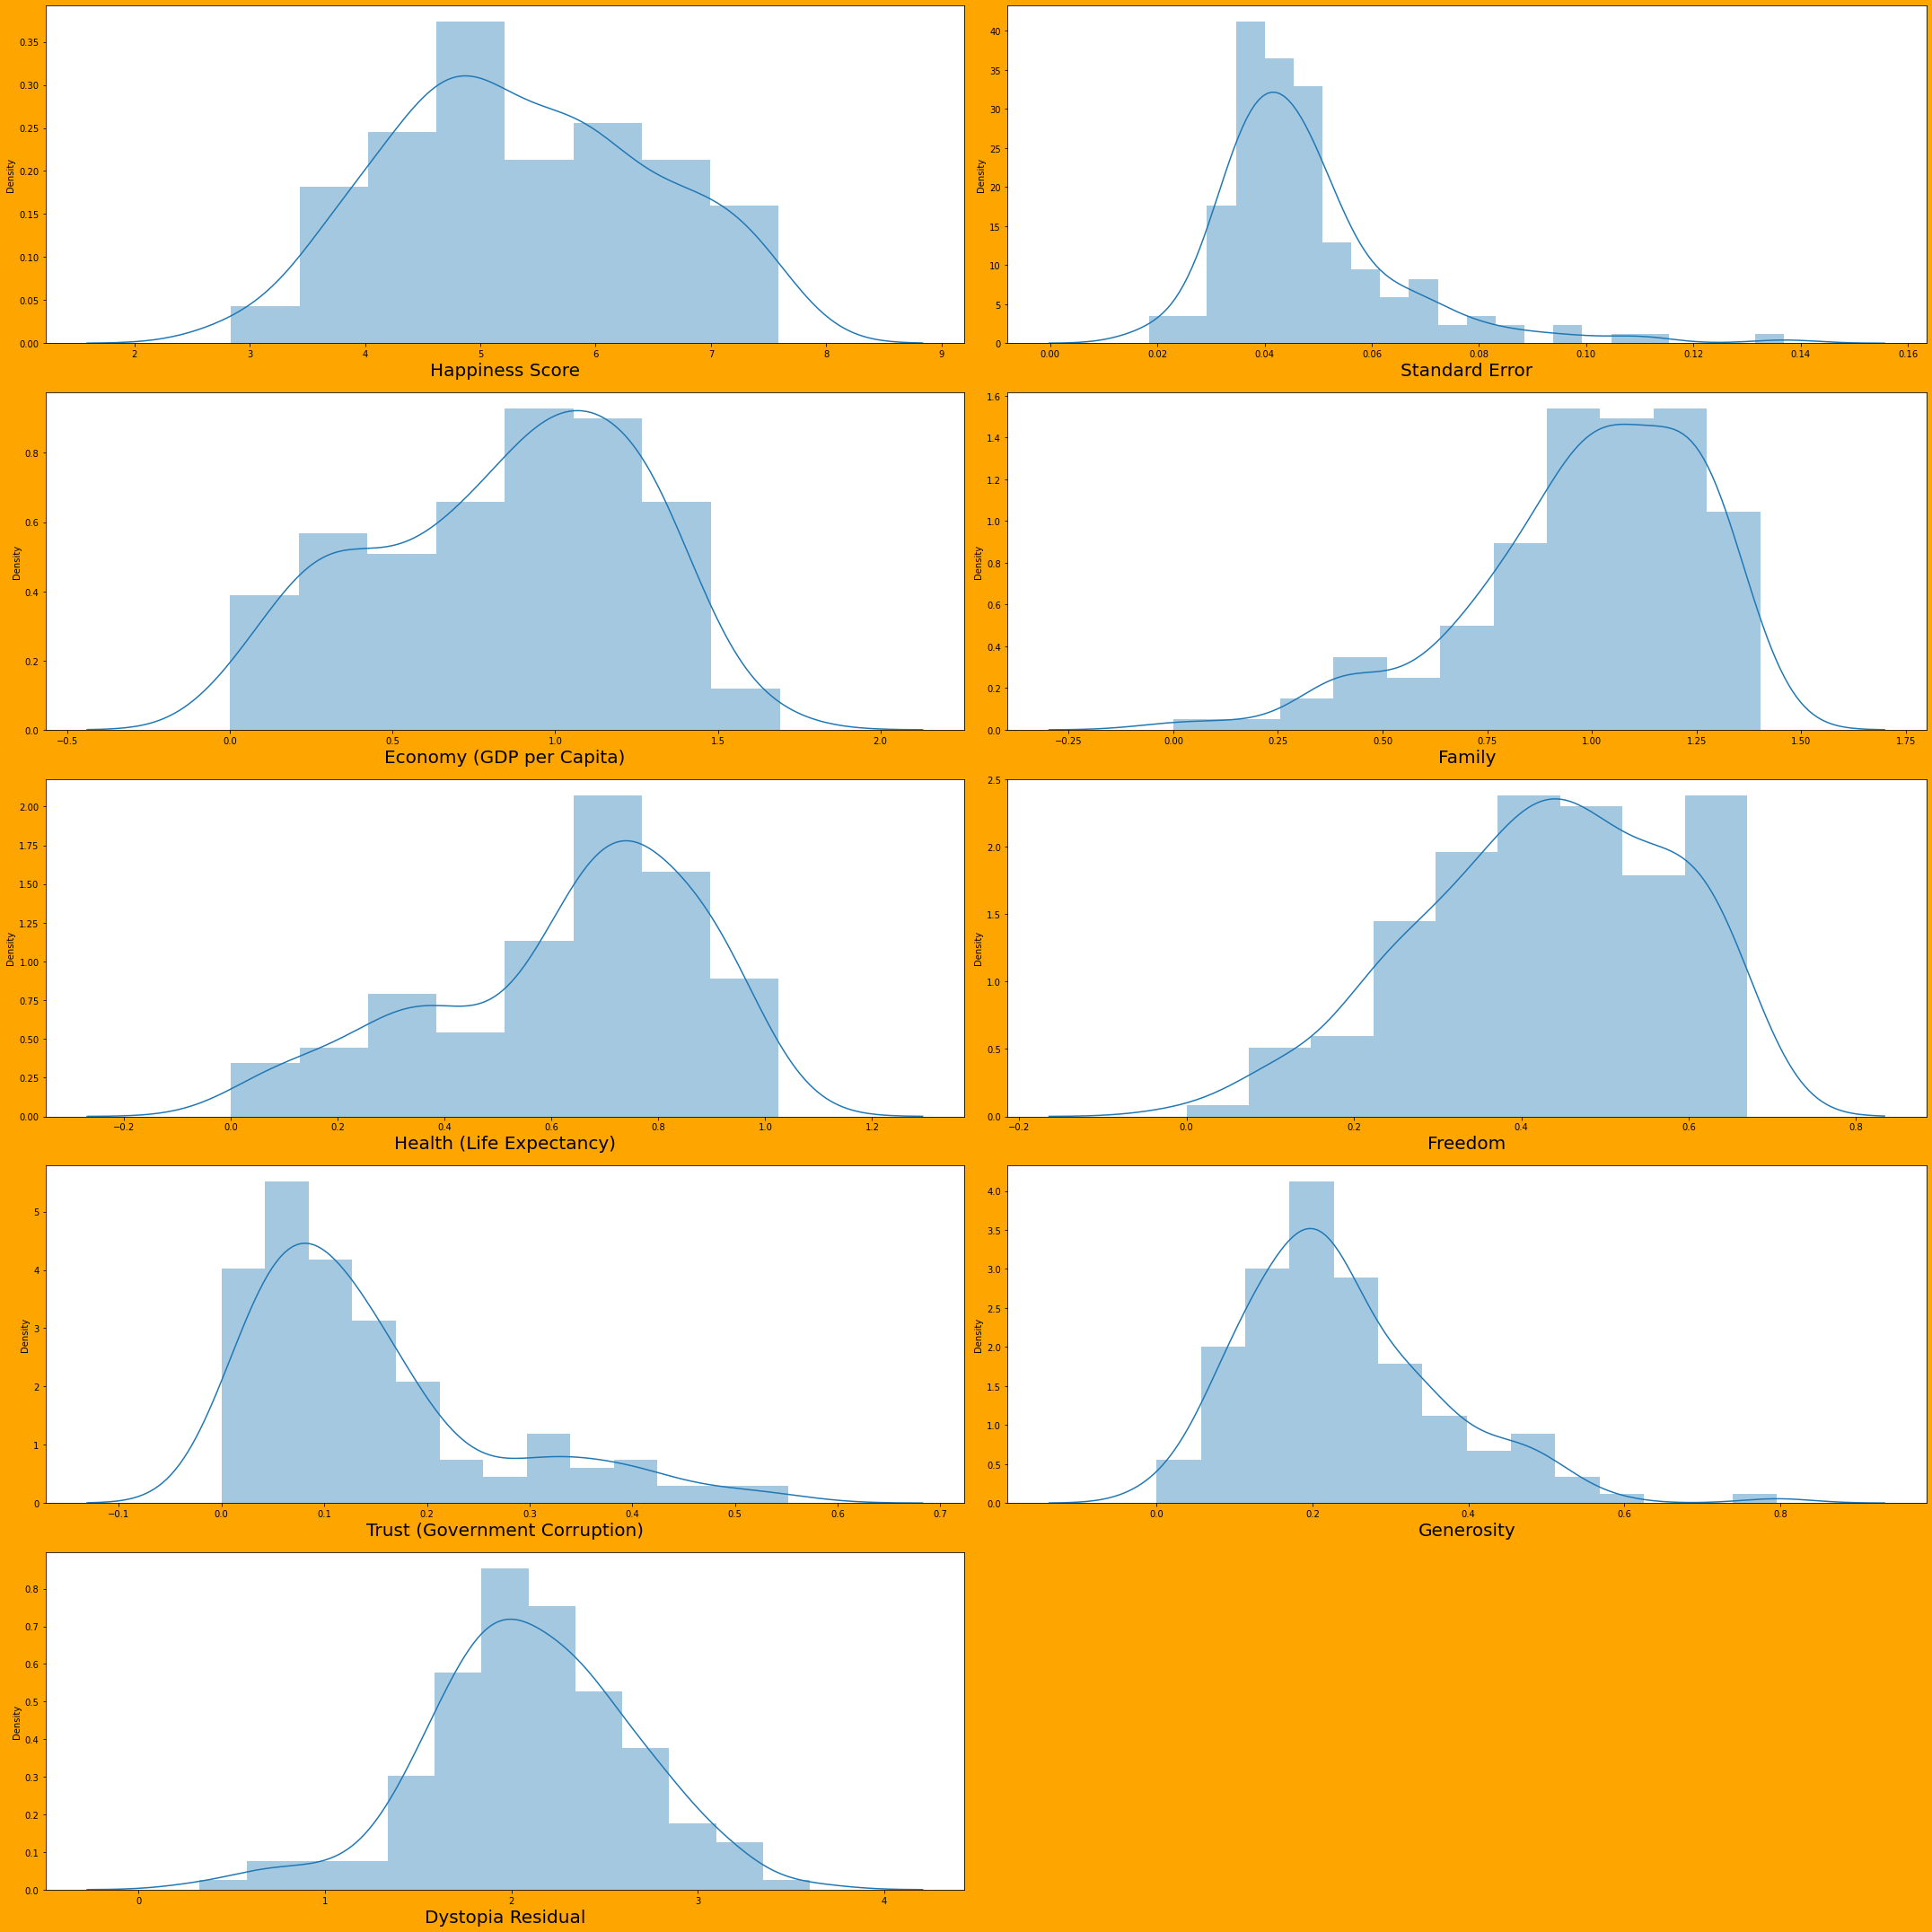

In [13]:
plt.figure(figsize=(30,30),facecolor='orange')
pn = 1

for column in df:
    if pn <= 10:
        ax = plt.subplot(5,2,pn)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    pn +=1
plt.tight_layout()

In [14]:
df.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

# Outliers

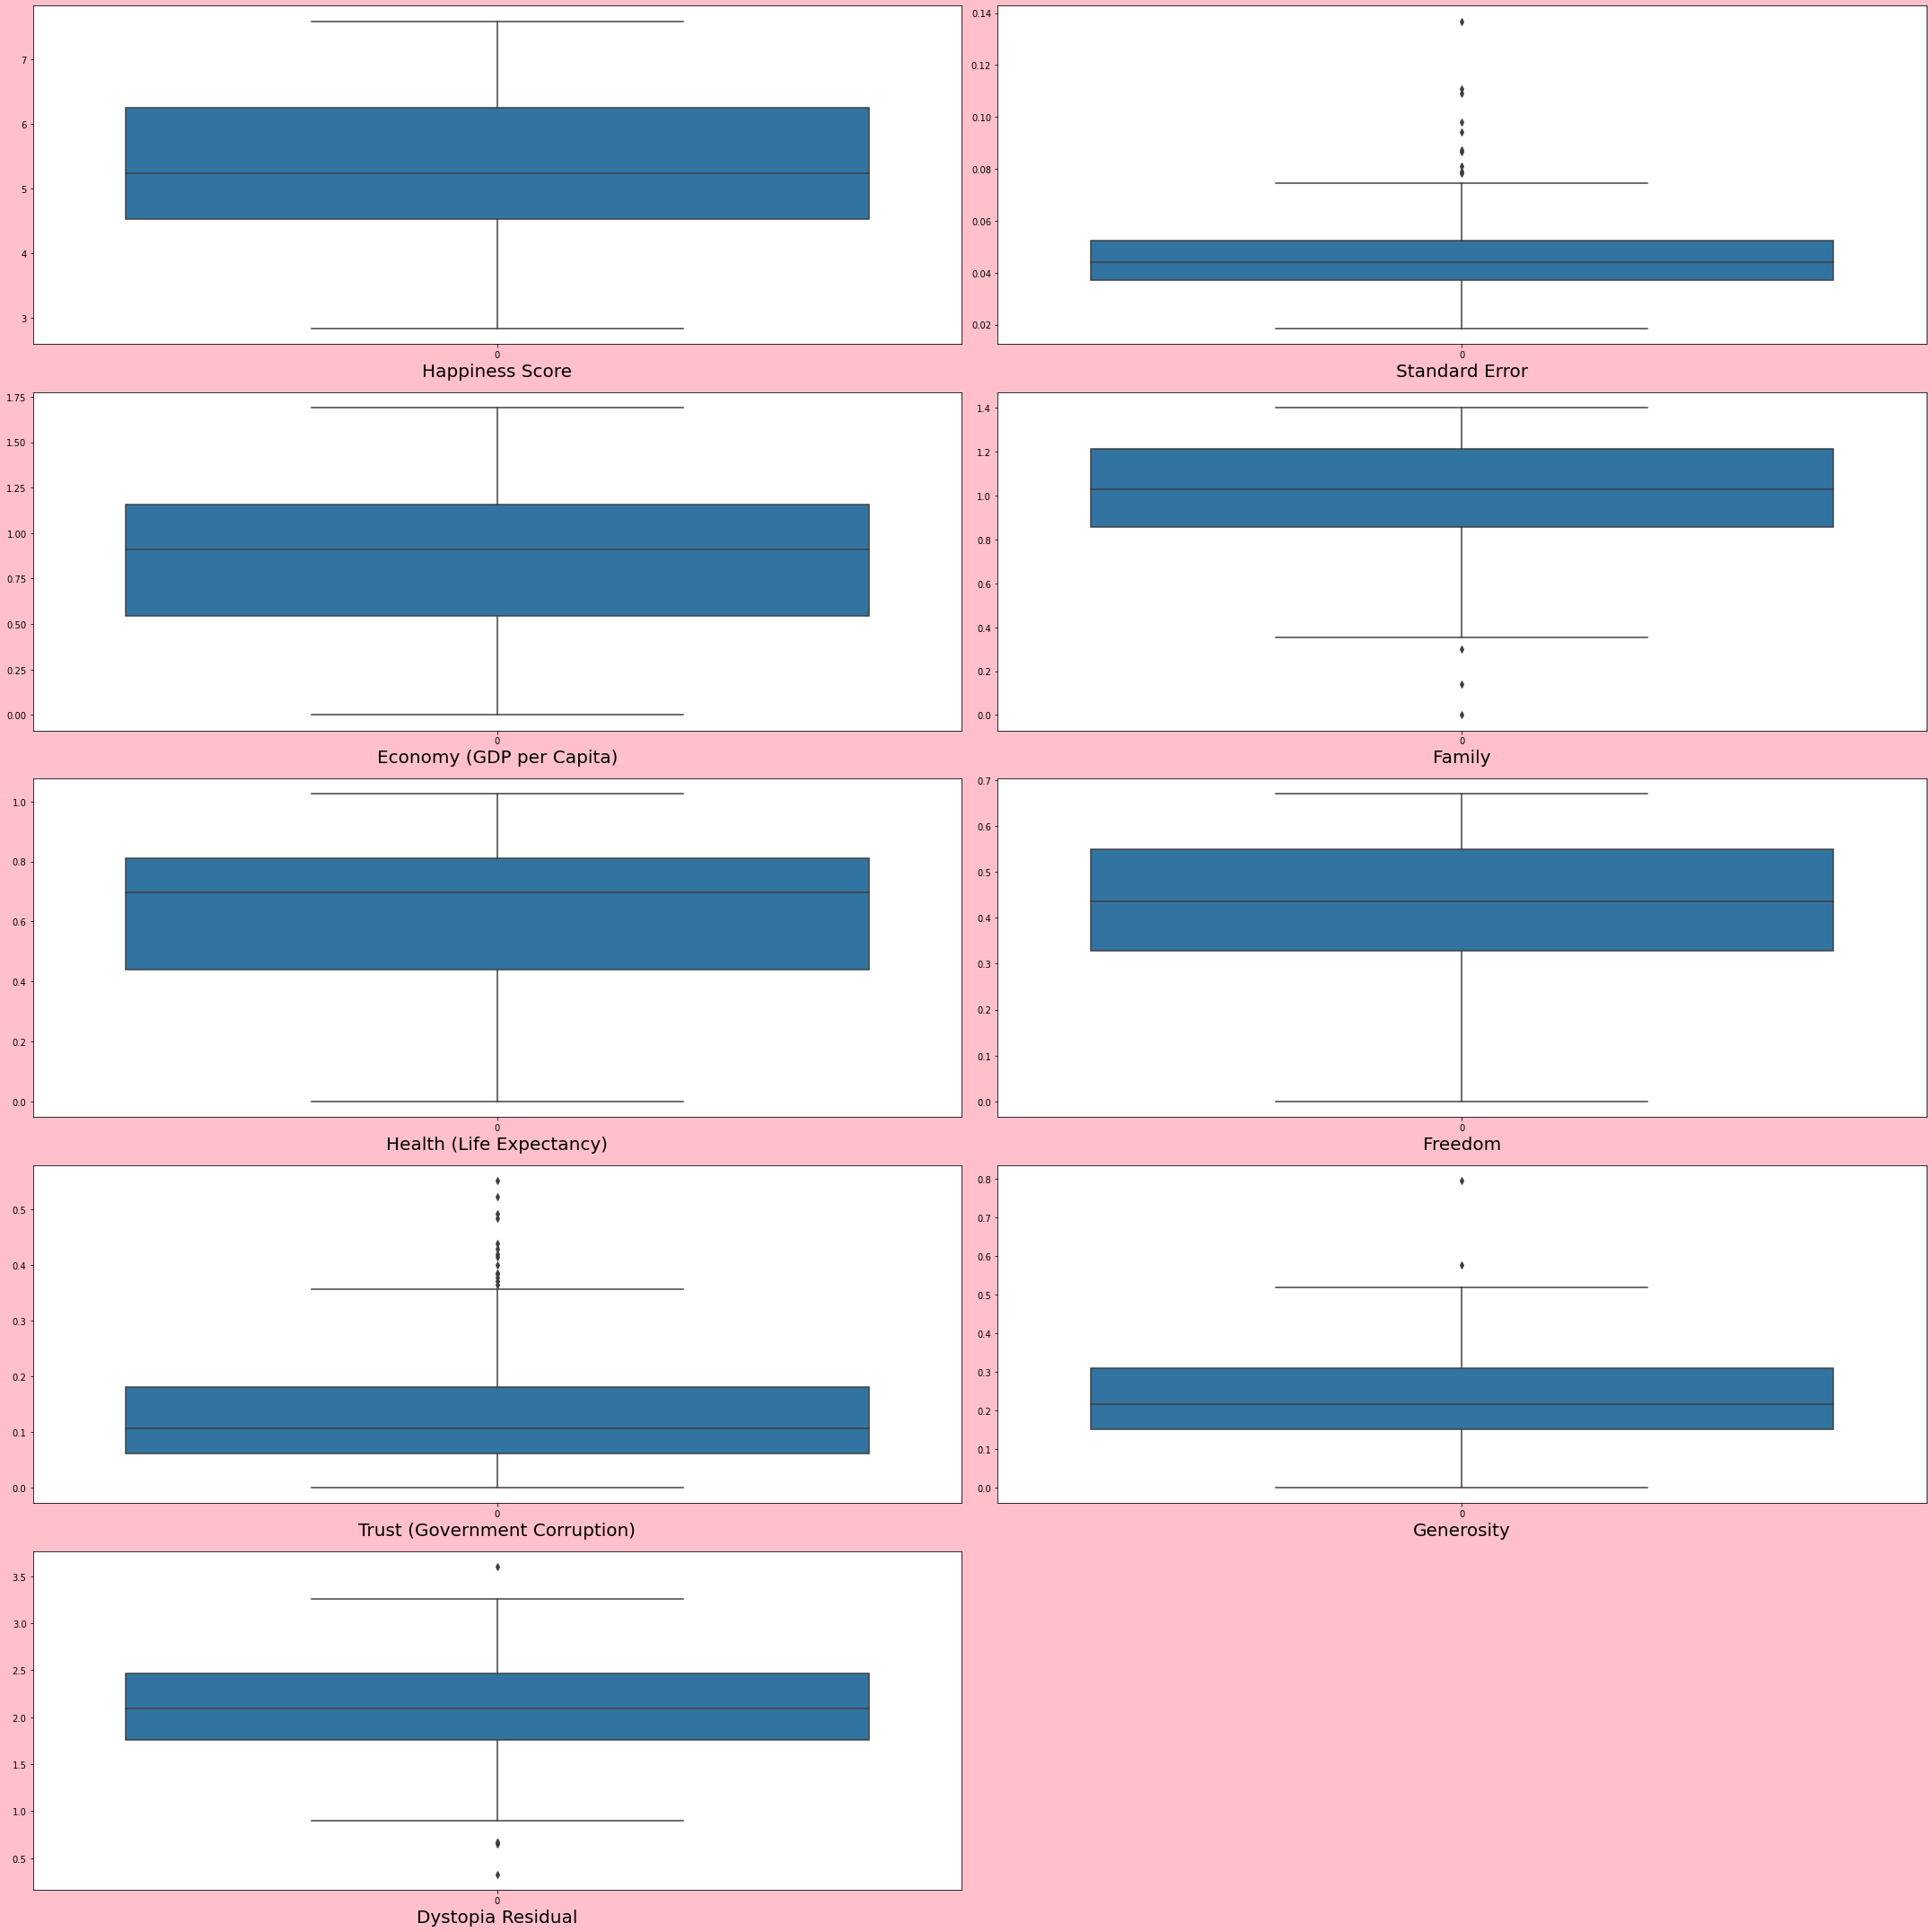

In [15]:
plt.figure(figsize=(30,30),facecolor='pink')
pn = 1

for column in df:
    if pn <= 10:
        ax = plt.subplot(5,2,pn)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    pn +=1
plt.tight_layout()

In [16]:
print(df['Standard Error'].quantile(0.90))
print(df['Standard Error'].quantile(0.10))

0.06791900000000002
0.033235


In [17]:
df['Standard Error'] = np.where(df['Standard Error'] > 0.067919000000000020,0.06791900000000002,df['Standard Error'])

<AxesSubplot: >

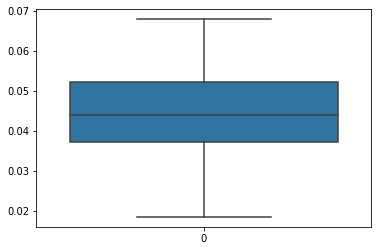

In [18]:
sns.boxplot(df['Standard Error'])

In [19]:
print(df['Family'].quantile(0.90))
print(df['Family'].quantile(0.10))

1.291461
0.6204390000000001


In [20]:
df['Family'] = np.where(df['Family'] < 0.6204390000000001,0.6204390000000001,df['Family'])

<AxesSubplot: >

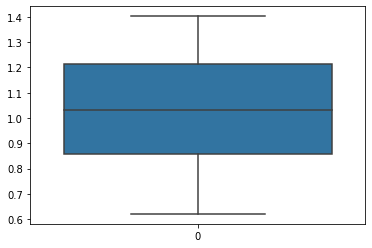

In [21]:
sns.boxplot(df['Family'])

In [22]:
print(df['Trust (Government Corruption)'].quantile(0.90))
print(df['Trust (Government Corruption)'].quantile(0.10))

0.326539
0.028650000000000002


In [23]:
df['Trust (Government Corruption)'] = np.where(df['Trust (Government Corruption)'] > 0.326539,0.326539,df['Trust (Government Corruption)'])

<AxesSubplot: >

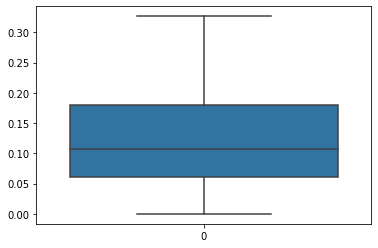

In [24]:
sns.boxplot(df['Trust (Government Corruption)'])

In [25]:
print(df['Generosity'].quantile(0.90))
print(df['Generosity'].quantile(0.10))

0.4123720000000001
0.106185


In [26]:
df['Generosity'] = np.where(df['Generosity'] > 0.4123720000000002,0.4123720000000002,df['Generosity'])

<AxesSubplot: >

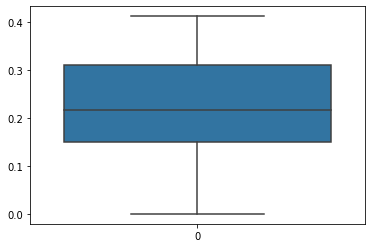

In [27]:
sns.boxplot(df['Generosity'])

In [28]:
print(df['Dystopia Residual'].quantile(0.90))
print(df['Dystopia Residual'].quantile(0.10))

2.801197
1.456452


In [29]:
df['Dystopia Residual'] = np.where(df['Dystopia Residual'] > 2.801197,2.801197,df['Dystopia Residual'])
df['Dystopia Residual'] = np.where(df['Dystopia Residual'] < 1.456452,1.456452,df['Dystopia Residual'])

<AxesSubplot: >

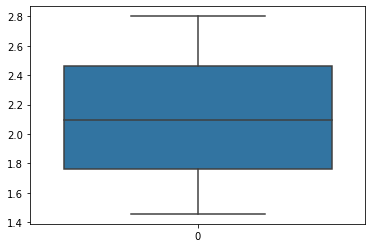

In [30]:
sns.boxplot(df['Dystopia Residual'])

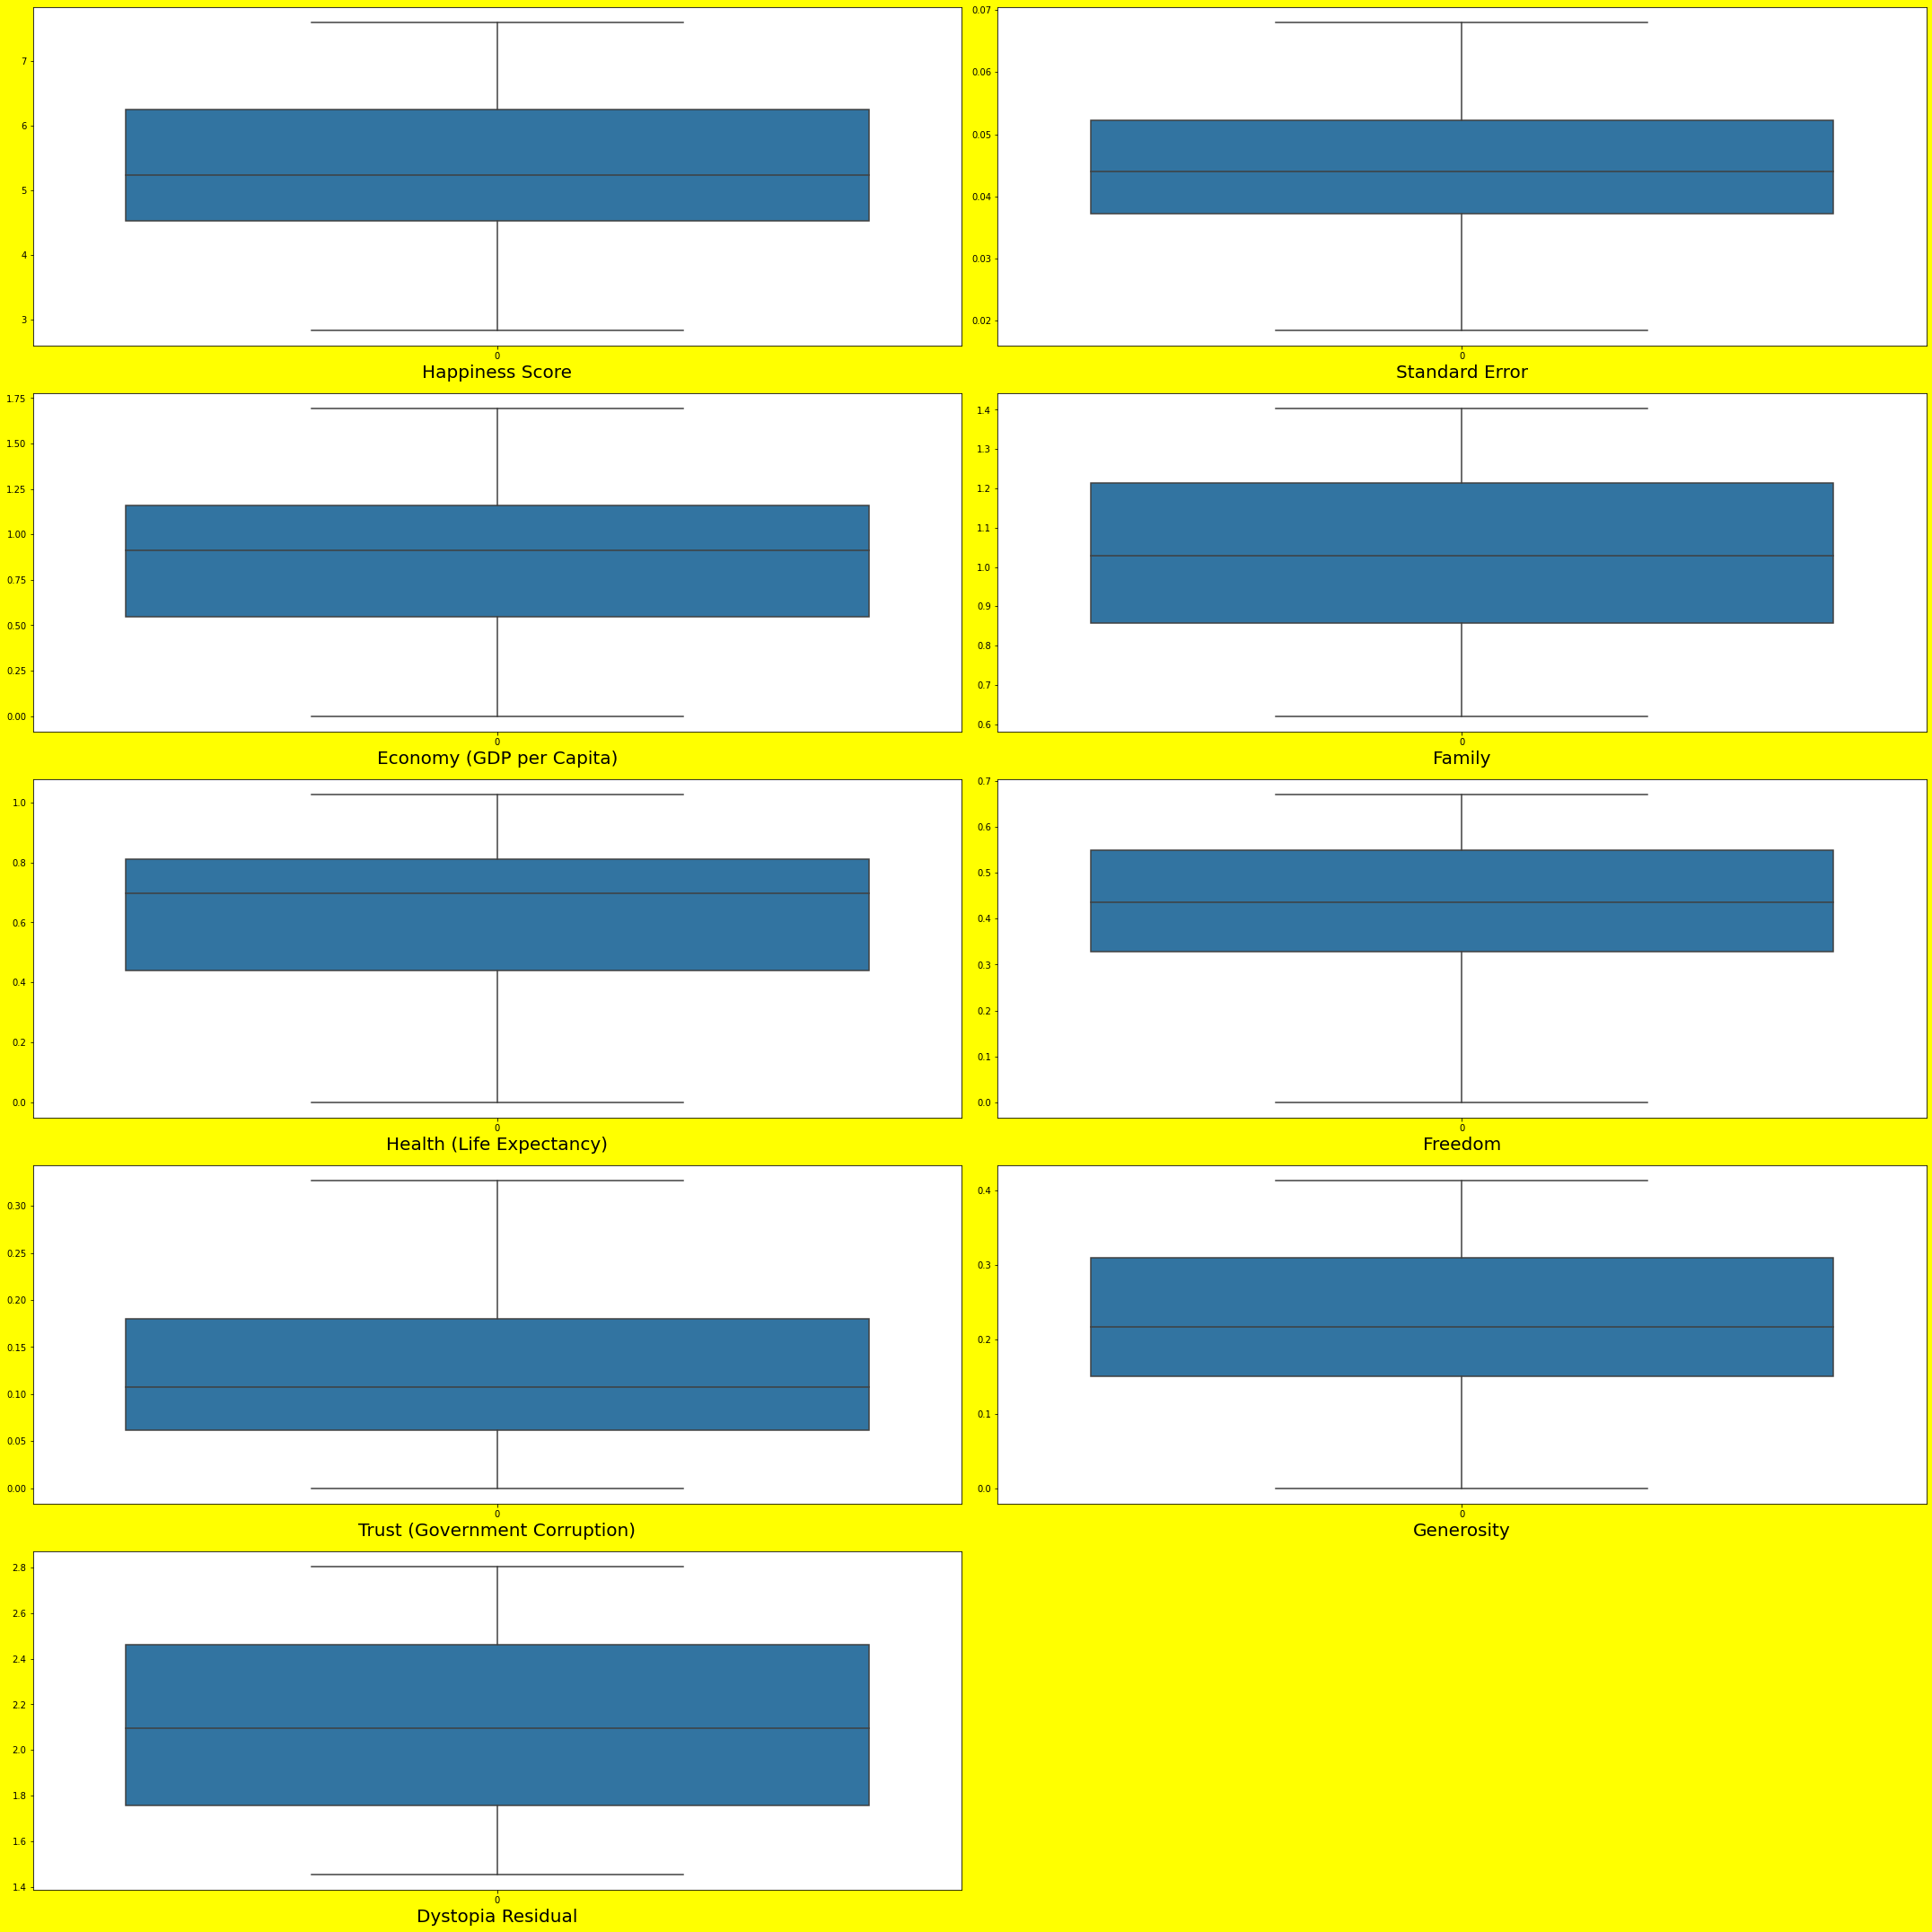

In [31]:
plt.figure(figsize=(30,30),facecolor='yellow')
pn = 1

for column in df:
    if pn <= 10:
        ax = plt.subplot(5,2,pn)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    pn +=1
plt.tight_layout()

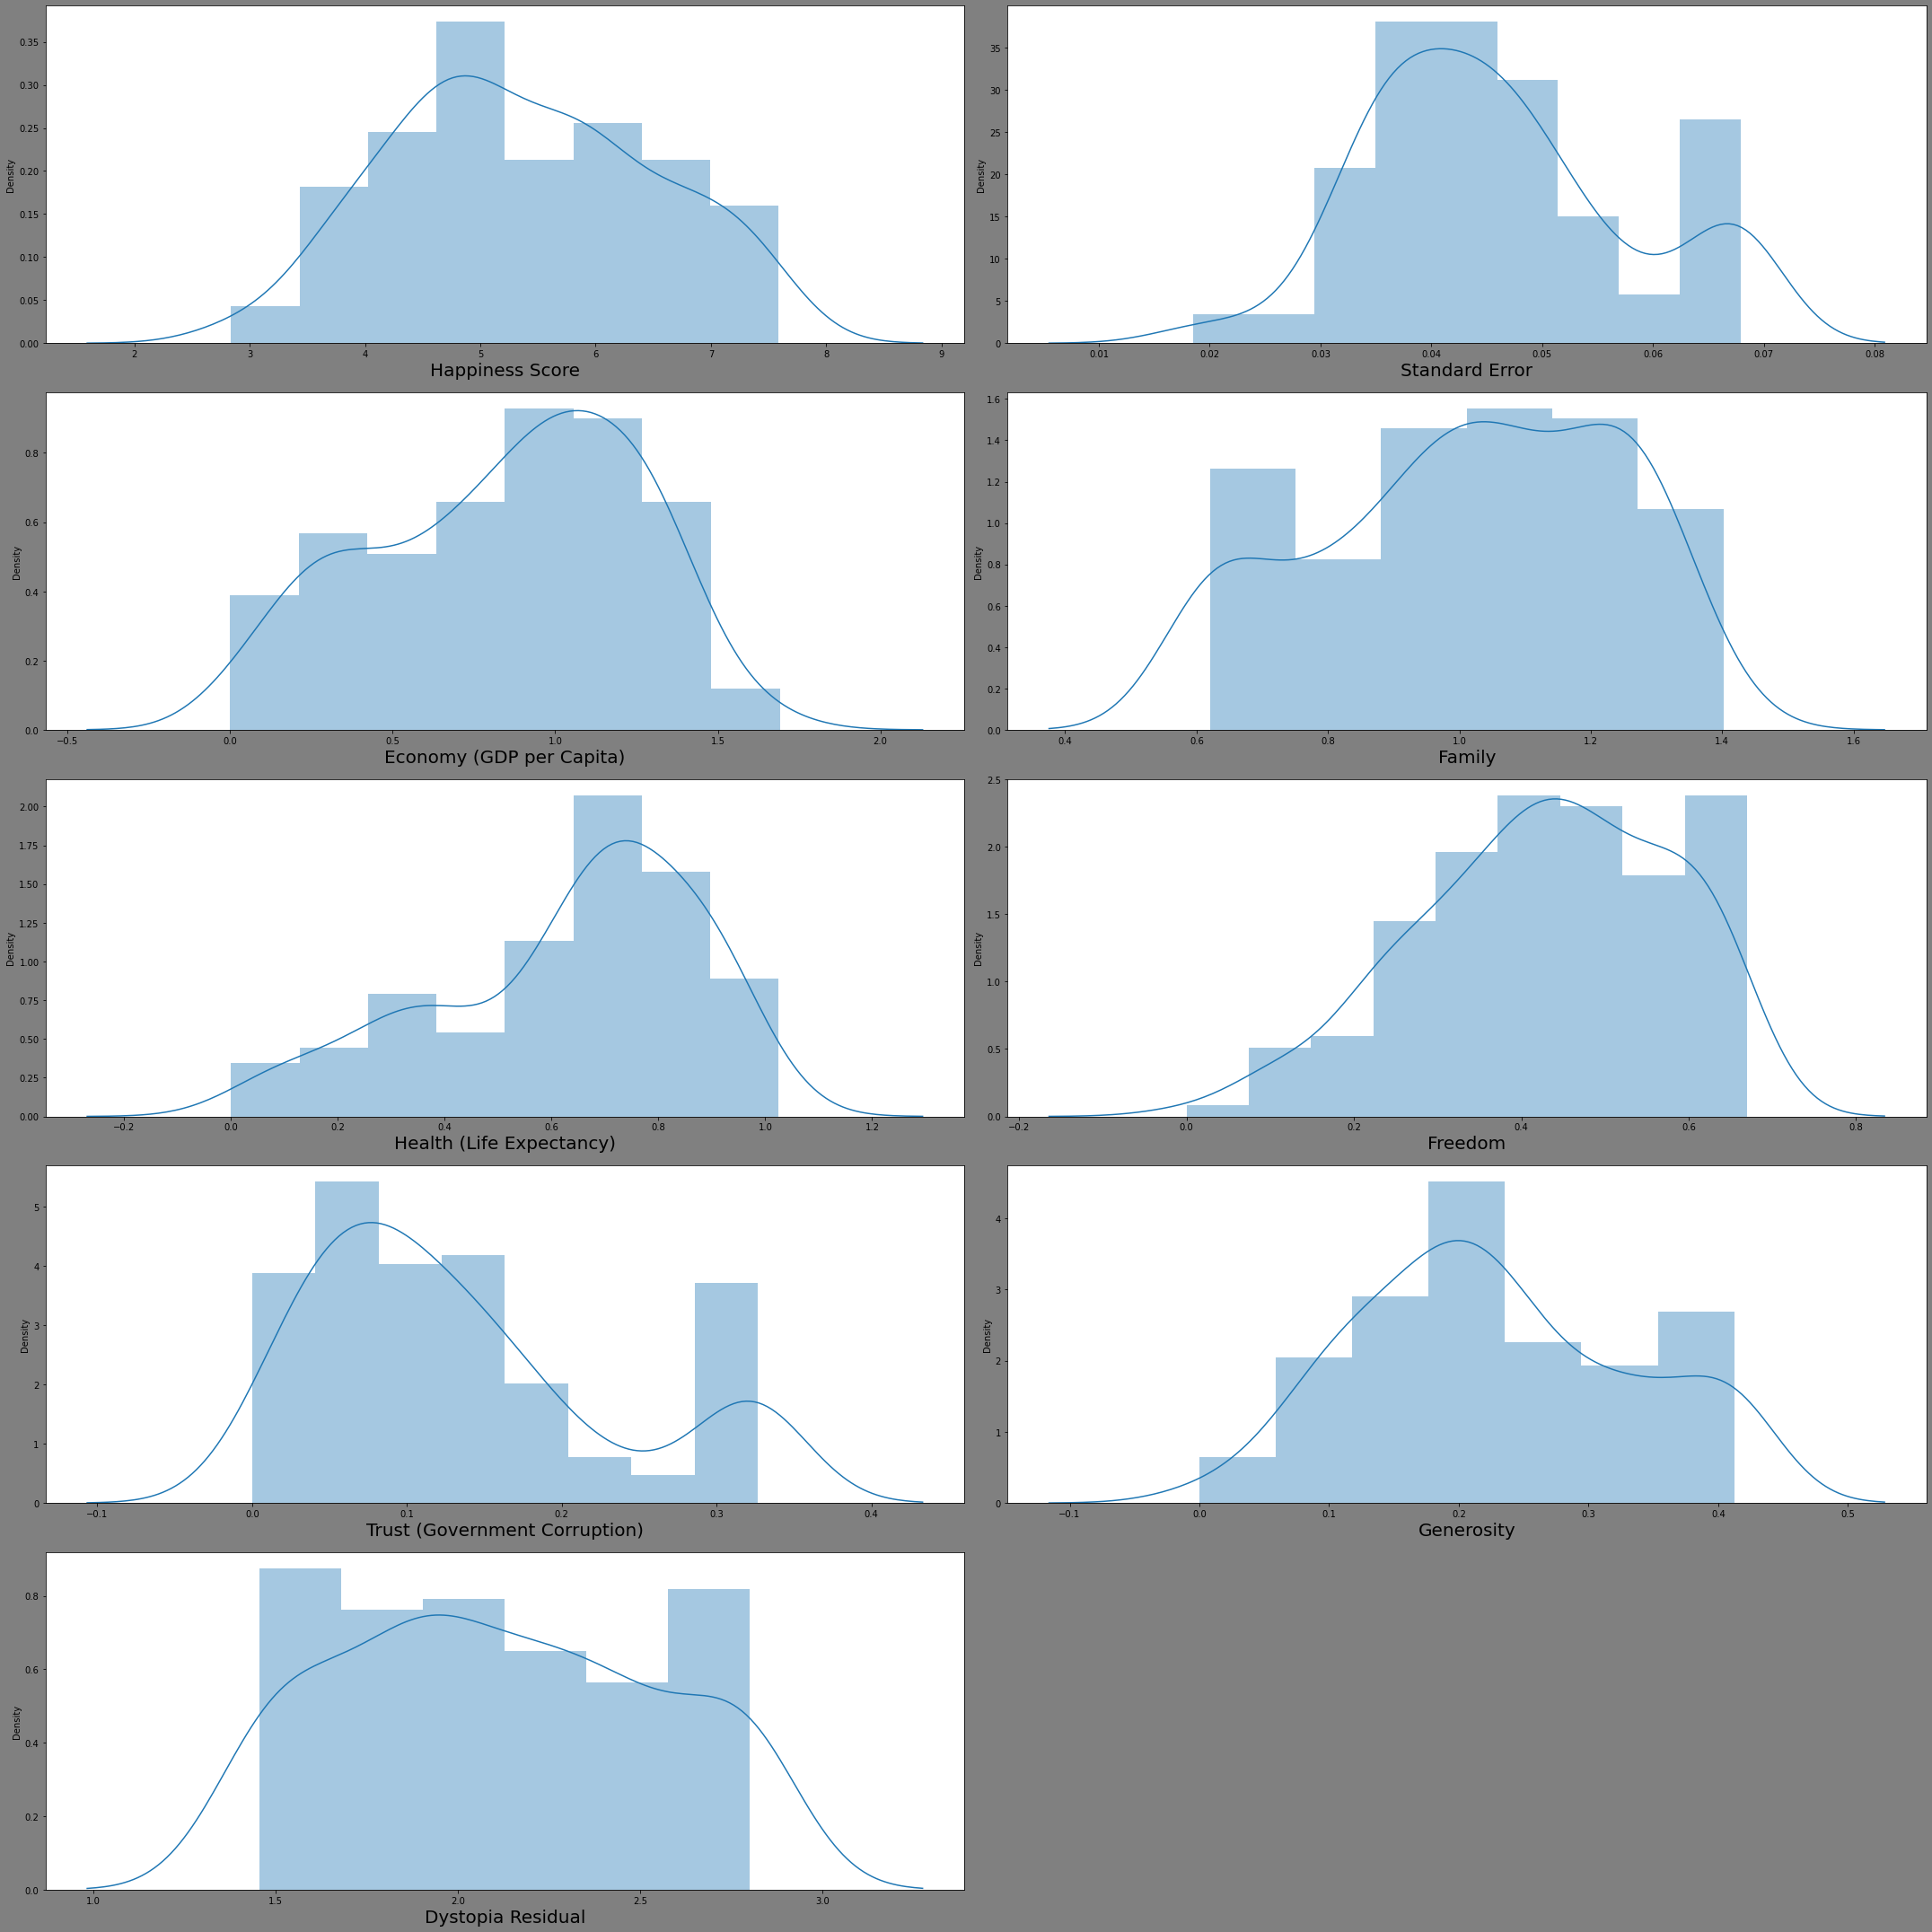

In [32]:
plt.figure(figsize=(30,30),facecolor='grey')
pn = 1

for column in df:
    if pn <= 10:
        ax = plt.subplot(5,2,pn)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    pn +=1
plt.tight_layout()

In [33]:
df.skew()

Happiness Score                  0.097769
Standard Error                   0.397984
Economy (GDP per Capita)        -0.317575
Family                          -0.315662
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    0.840656
Generosity                       0.225235
Dystopia Residual                0.107477
dtype: float64

# Checking Correlation

In [34]:
df_corr = df.corr()
df_corr

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.234101,0.780966,0.762521,0.724200,0.568211,0.404202,0.198494,0.523492
Standard Error,-0.234101,1.000000,-0.231406,-0.187493,-0.329051,-0.179356,-0.161471,-0.087645,0.036948
Economy (GDP per Capita),0.780966,-0.231406,1.000000,0.655945,0.816478,0.370300,0.300598,0.002896,0.042180
Family,0.762521,-0.187493,0.655945,1.000000,0.534044,0.489420,0.239101,0.125085,0.173223
Health (Life Expectancy),0.724200,-0.329051,0.816478,0.534044,1.000000,0.360477,0.237250,0.113554,0.033996
Freedom,0.568211,-0.179356,0.370300,0.489420,0.360477,1.000000,0.490168,0.403442,0.087234
Trust (Government Corruption),0.404202,-0.161471,0.300598,0.239101,0.237250,0.490168,1.000000,0.282263,0.026823
Generosity,0.198494,-0.087645,0.002896,0.125085,0.113554,0.403442,0.282263,1.000000,-0.025253
Dystopia Residual,0.523492,0.036948,0.042180,0.173223,0.033996,0.087234,0.026823,-0.025253,1.000000


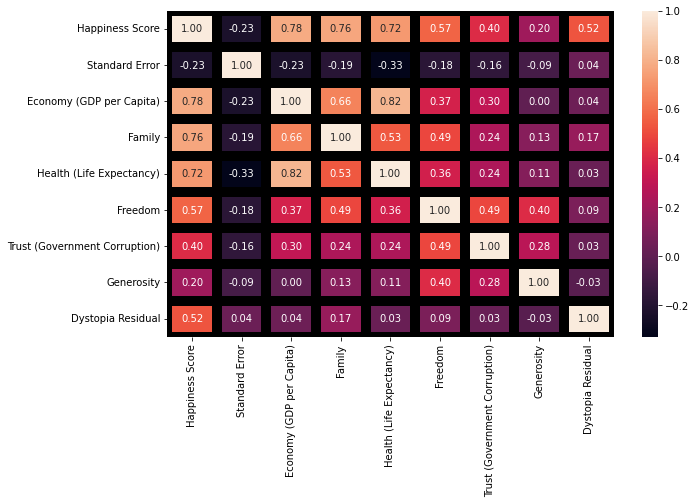

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(df_corr,annot=True,fmt='0.2f',linecolor='black',linewidths=10);

X is our feature variables and y is our target variable

In [36]:
X = df.drop(['Happiness Score'],axis=1)
print(X)
y = df['Happiness Score']
print(y)

     Standard Error  Economy (GDP per Capita)    Family  \
0          0.034110                   1.39651  1.349510   
1          0.048840                   1.30232  1.402230   
2          0.033280                   1.32548  1.360580   
3          0.038800                   1.45900  1.330950   
4          0.035530                   1.32629  1.322610   
..              ...                       ...       ...   
153        0.034640                   0.22208  0.773700   
154        0.036560                   0.28665  0.620439   
155        0.050150                   0.66320  0.620439   
156        0.067919                   0.01530  0.620439   
157        0.067270                   0.20868  0.620439   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                       0.326539   
1                     0.94784  0.62877                       0.141450   
2                     0.87464  0.64938                       0.326539   

Relationship between all feature variables with target variable  

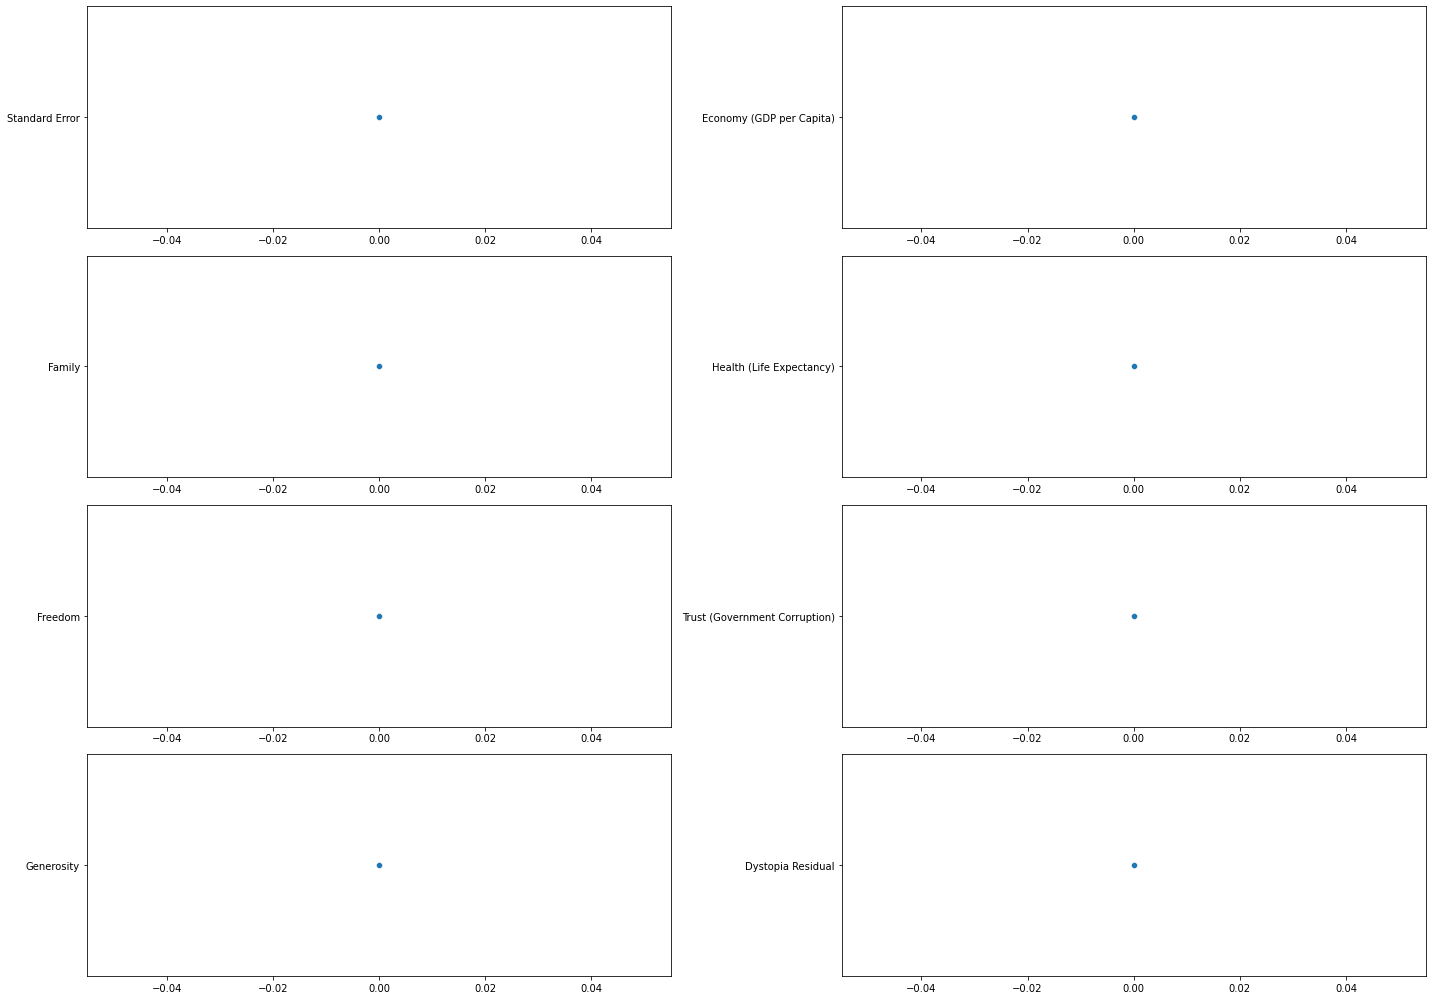

In [42]:
plt.figure(figsize=(20,14))
pn = 1

for column in X:
    if pn <= 8:
        ax = plt.subplot(4,2,pn)
        sns.scatterplot(column)        
    pn +=1
plt.tight_layout()

There were skewness in the feature variables we will transform it by using PowerTransfomer

In [43]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
x = pt.fit_transform(X)
x

array([[-1.019534  ,  1.44606101,  1.63571005, ...,  1.64073768,
         0.68160602,  0.94102664],
       [ 0.32263422,  1.17332111,  1.93730033, ...,  0.32751263,
         1.63889967,  1.32547197],
       [-1.10357471,  1.23983557,  1.69827202, ...,  1.64073768,
         1.06435302,  0.88719009],
       ...,
       [ 0.42939622, -0.5134688 , -1.6285676 , ...,  0.78241282,
         1.63889967, -1.58972433],
       [ 1.70491151, -1.89495386, -1.6285676 , ..., -0.16024724,
        -0.24078288, -0.61831801],
       [ 1.66349969, -1.52122584, -1.6285676 , ..., -0.07308916,
        -0.54426501, -1.29385524]])

In [44]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()


In [45]:
#X_scaled = scaler.fit_transform(X)

#X_scaled

Model building

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=49)

In [49]:
x_train

array([[-1.31997356e-01, -1.39329041e+00, -1.31822223e+00,
        -7.52829844e-01, -6.92129050e-03,  7.93228459e-01,
         1.63889967e+00, -1.58972433e+00],
       [-8.36631915e-01,  1.18908428e+00,  1.28275116e+00,
         1.21605464e+00,  1.07435432e+00,  1.06496633e+00,
         2.72939432e-03,  7.21503611e-01],
       [-4.58994732e-02,  3.62165503e-01, -1.62856760e+00,
         1.47199893e-01, -9.00187404e-01, -7.84155245e-01,
         1.38880682e+00, -9.64977940e-01],
       [-7.09218090e-01, -6.74504532e-01, -1.62856760e+00,
        -6.34213525e-01, -1.83829247e+00, -1.07508149e-01,
         1.02501932e+00,  1.52659456e+00],
       [-2.08447188e+00,  5.14694624e-02, -3.70814961e-01,
         7.55437142e-01,  5.47674101e-01, -1.34208511e+00,
        -1.45114440e+00, -5.51229774e-01],
       [-3.73447076e-01,  1.26318316e+00,  1.41148341e+00,
         1.42981646e+00,  1.63177353e+00,  1.64073768e+00,
         1.63889967e+00,  3.95691627e-01],
       [-2.53639300e+00, -5.570945

In [50]:
x_test

array([[ 0.36360826, -0.41157251,  0.02551892, -0.37222669,  1.41196302,
         0.11730257,  0.25963488, -0.81546881],
       [-0.11786144, -0.78852854, -1.41917917, -1.03095908, -0.56400681,
        -0.47078699, -1.34543369, -0.39916853],
       [-0.65736307, -1.55737966, -1.6285676 , -0.89939076, -0.04603201,
         0.42229449,  0.19792382,  0.79461577],
       [ 0.25482871,  0.77231256,  0.52404859,  1.0884508 ,  0.53053568,
        -1.69434377, -0.84991904, -1.58972433],
       [-0.14439175,  0.40707434, -0.97570792,  0.88288265, -0.66685027,
        -1.00453675, -0.03503584, -1.28510057],
       [-0.28955783,  0.22915817,  0.96857271, -0.54154648,  0.24674668,
         1.55598452, -0.51409996, -0.52820142],
       [-0.63920942, -0.67673613, -0.06572038, -0.21560251, -0.73395791,
        -1.57956487, -0.12178127,  1.52659456],
       [ 0.25066962, -1.45937382, -1.00402536, -1.14765326, -1.29941146,
         0.86466447, -0.46754054, -0.31532118],
       [-0.24800913, -0.32196754

In [51]:
y_test

89     5.073
135    4.077
121    4.512
87     5.102
102    4.839
69     5.548
51     5.889
139    3.956
129    4.297
23     6.798
44     5.995
6      7.378
85     5.124
107    4.715
86     5.123
132    4.252
73     5.399
130    4.292
106    4.739
19     6.901
81     5.192
115    4.571
123    4.436
46     5.984
2      7.527
65     5.695
29     6.574
78     5.253
144    3.819
53     5.855
104    4.788
0      7.587
95     4.949
17     6.940
151    3.587
97     4.885
101    4.857
1      7.561
52     5.878
45     5.987
Name: Happiness Score, dtype: float64

In [52]:
y_train

128    4.307
18     6.937
109    4.686
80     5.194
83     5.140
       ...  
124    4.419
126    4.350
133    4.218
140    3.931
114    4.610
Name: Happiness Score, Length: 118, dtype: float64

# Linear Regression

In [53]:
lr = LinearRegression()
lr.fit(x_train,y_train)
prediction_lr = lr.predict(x_test)
r2_score(y_test,prediction_lr)

0.9828788584906023

# Decision Tree

In [54]:
DT = DecisionTreeRegressor()
DT.fit(x_train,y_train)
prediction_DT = DT.predict(x_test)
r2_score(y_test,prediction_DT)

0.6008672011412401

# Random Forest

In [55]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
r2_score(y_test,y_pred_rf)

0.9349070465042812

In [56]:
rf

RandomForestRegressor()

# Ada Boost

In [57]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)
r2_score(y_test,y_pred)

0.9119950076992881

# Gradient Boosting

In [58]:
gbt = GradientBoostingRegressor()
gbt.fit(x_train,y_train)
y_pred = gbt.predict(x_test)
print(y_pred)
r2_score(y_test,y_pred)

[4.85355993 4.04459493 4.37915521 5.44504632 4.85818856 5.37643632
 5.83985172 3.85137038 4.16087115 5.98028203 5.78730537 7.35930377
 4.85760687 5.30952535 5.13575084 4.14129157 5.19582501 4.49022718
 4.99582528 7.06306912 5.22862327 4.5884764  4.58787116 5.93320253
 7.42233171 5.85558341 6.76105604 5.05874851 3.72705734 6.08833465
 5.01037598 7.31003007 5.17755932 6.90223727 3.7678592  5.06090108
 5.37935996 7.30850662 5.87500636 5.99948574]


0.9492135249402539

In [59]:
gbtcross = cross_val_score(gbt,x_train,y_train,cv=5)
print(gbtcross)
print(gbtcross.mean())

[0.87383714 0.82238561 0.86470928 0.86259497 0.9441534 ]
0.8735360796809113


In [60]:
gbt

GradientBoostingRegressor()

# Hyper Parameter Tuning

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['ls','lad','huber','quantile'],'n_estimators':[50,100,200,300],'learning_rate':[0.1,1,0.001]}
gbc=GridSearchCV(gbt,parameters)
gbc.fit(x_train,y_train)
print(gbc.best_params_)

{'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 200}


In [65]:
gbt=GradientBoostingRegressor(loss='huber',n_estimators=200,learning_rate=0.1)
gbt.fit(x_train,y_train)
gbt_predict=gbt.predict(x_test)
gbts=r2_score(y_test,gbt_predict)*100
print("r2 score=",gbts)
gbtscore=cross_val_score(gbt,x_test,y_test,cv=5).mean()*100
print('cross val score=',gbtscore)

r2 score= 95.24450616142443
cross val score= 84.89500004718539


In [66]:
print("Gradient Boost")
from sklearn.metrics import mean_absolute_error,mean_squared_error

print("mean absolute error i=",mean_absolute_error(y_test,gbt_predict))
print("mean squared error is=",mean_squared_error(y_test,gbt_predict))
print("Root mean square error(RMSE)=",np.sqrt(mean_squared_error(y_test,gbt_predict)))

Gradient Boost
mean absolute error i= 0.1820903060396099
mean squared error is= 0.054963445078985075
Root mean square error(RMSE)= 0.23444283968375976


Save the model 

In [67]:
import joblib

In [77]:
 
filename="World_Happiness_Report.pkl"
joblib.dump(gbt,filename)

['World_Happiness_Report.pkl']

In [78]:
load_model = joblib.load(filename)
load_model

GradientBoostingRegressor(loss='huber', n_estimators=200)

In [79]:
X.columns

Index(['Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

Testing with unseen data

In [72]:
input_data = (0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738)

In [73]:
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
input_data_as_numpy_array.shape

(8,)

In [74]:
# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
input_data_reshaped.shape

(1, 8)

In [75]:
prediction = load_model.predict(input_data_reshaped)
prediction[0]

7.187896491894078

In [81]:
X

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.034110,1.39651,1.349510,0.94143,0.66557,0.326539,0.296780,2.517380
1,0.048840,1.30232,1.402230,0.94784,0.62877,0.141450,0.412372,2.702010
2,0.033280,1.32548,1.360580,0.87464,0.64938,0.326539,0.341390,2.492040
3,0.038800,1.45900,1.330950,0.88521,0.66973,0.326539,0.346990,2.465310
4,0.035530,1.32629,1.322610,0.90563,0.63297,0.326539,0.412372,2.451760
...,...,...,...,...,...,...,...,...
153,0.034640,0.22208,0.773700,0.42864,0.59201,0.326539,0.226280,1.456452
154,0.036560,0.28665,0.620439,0.31910,0.48450,0.080100,0.182600,1.633280
155,0.050150,0.66320,0.620439,0.72193,0.15684,0.189060,0.412372,1.456452
156,0.067919,0.01530,0.620439,0.22396,0.11850,0.100620,0.197270,1.833020
